# The singular value decomposition

#### Fourth practical work, Monday,  October 26, 2020

This tutorial introduces a matrix decomposition method known as the *singular value decomposition*. There will be no test on this material.

Run the following cell to import the librairies used in this Notebook.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Singular Value Decomposition (SVD)

The SVD is the generalization of the eigendecomposition to *any* matrix M, in particular to singular or non-square matrices. It reads

$$ M = Q D P$$

where Q and P are orthogonal matrices (Q<sup>-1</sup> = Q<sup>T</sup> and P<sup>-1</sup> = P<sup>T</sup>) and D is a diagonal matrix. The values along the diagonal of D are the singular values of M. It therefore decomposes M into a rotation, a re-scaling and another rotation (in general unrelated to the first one). Since M is not necessarily a square matrix, D may not be square either but Q and P are: for the following *2x3* matrix,

$$ \begin{pmatrix} 1 & 2 & 3  \\ 4 & 5 & 6 \end{pmatrix} \hspace{.5cm}= \hspace{.5cm} \begin{pmatrix} -0.39 & -0.92  \\ -0.92 & 0.39 \end{pmatrix} \hspace{.5cm}\times\hspace{.5cm} \begin{pmatrix} 9.51 & 0 & 0  \\ 0 & 0.77 & 0 \end{pmatrix} \hspace{.5cm}\times\hspace{.5cm} \begin{pmatrix} -0.43 & -0.57 & -0.70  \\ 0.81 & 0.11 & -0.58 \\ 0.41 & -0.82 & 0.41 \end{pmatrix}$$

The computation of the SVD can be done with ```np.linalg.svd``` (for sparse matrices, consider ```sp.sparse.linalg.svds```).

#### SVD to approximate a matrix

We first introduce the SVD because it provides a decomposition of any matrix M of size *mxn* of the form

$$ M = M_1 + M_2 + ... M_N, ~~~~ N=\mathrm{min}(m,n),~~~~ \vert M_1 \vert \geqslant \vert M_2 \vert \geqslant \dots \geqslant \vert M_N \vert, ~~~~ \vert M_i \vert = \lambda_i$$ 

where | M | is the Frobenius norm of M,  λ<sub>i</sub> is the i<sup>th</sup> singular value of M and, crucially, where all the matrices M<sub>i</sub> *only require (n+m+1) numbers to be defined*. In the above example, we would have 

$$ M_1 = \begin{pmatrix} -0.39 & 0  \\ -0.92 & 0 \end{pmatrix} \times \begin{pmatrix} 9.51 & 0 & 0  \\ 0 & 0 & 0 \end{pmatrix} \times \begin{pmatrix} -0.43 & -0.57 & -0.70  \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix} =  \begin{pmatrix} 1.57 & 2.08 & 2.59  \\ 3.76 & 4.97 & 6.17 \end{pmatrix}$$

$$ M_2 = \begin{pmatrix} 0 & -0.92  \\ 0 & 0.39 \end{pmatrix} \times \begin{pmatrix} 0 & 0 & 0  \\ 0 & 0.77 & 0 \end{pmatrix} \times \begin{pmatrix} 0 & 0 & 0  \\ 0.81 & 0.11 & -0.58 \\ 0 & 0 & 0 \end{pmatrix} =  \begin{pmatrix} -0.57 & -0.08 & 0.41  \\ 0.24 & 0.03 & -0.17 \end{pmatrix}$$

$$ \vert M_1 \vert = \sqrt{1.57^2+2.08^2+2.59^2+3.76^2+4.97^2+6.17^2} = 9.51, ~~~ \vert M_2 \vert = 0.77 $$


Therefore, if the singular values drop fast enough, an accurate approximate of M can be obtained only with the first couple of largest singular values and would require much less memory to be stored than M. In other words, it is a way to compress large matrices.

### Exercise 1: compress an image

We consider [this black and white royalty-free photography](https://pxhere.com/fr/photo/93737) (TP4_1.png, in the add_files folder): it is nothing but a non-square matrix, each element being associated with a pixel. Let us load it and print it with the next code cell.

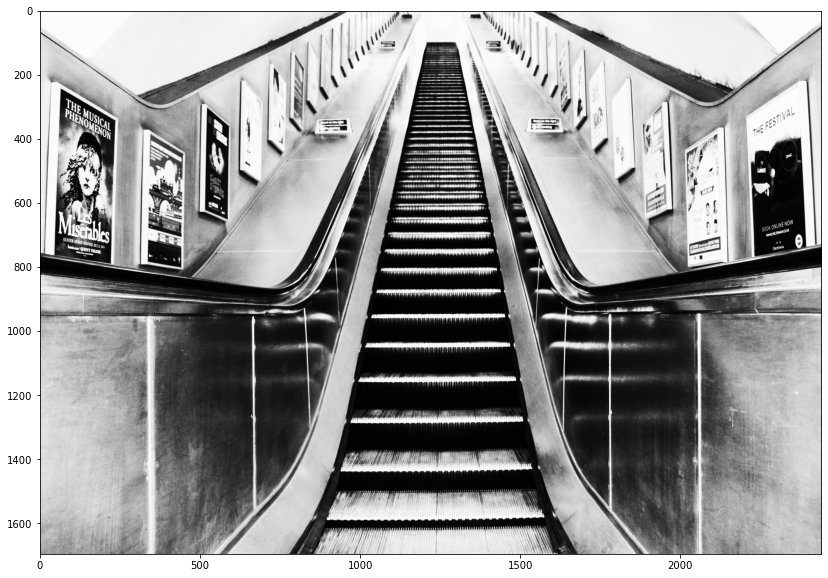

In [146]:
img = mpimg.imread("TP4_1.png")[:, :, 0] # load this photography as a 2D array

fig, ax = plt.subplots(figsize=(14, 14*img.shape[1]/img.shape[0]))
ax.imshow(img, cmap='gray')
plt.show()

Now, we will try to compress this photography.

1. Print the size of the `img` array. How many floating-point numbers are thus needed to fully define this array ?
2. Compute the SVD of this 2D array with `Q, S_val, P = np.linalg.svd(img)` (it may take up to 20 seconds to run), where Q and P and the matrices introduced above whereas S<sub>val</sub> is a 1D array of M's singular values. How many singular values are there ?
3. Plot the first fifty singular values. If the dropoff is steep, an estimate of this image with the first tens of singular values should be accurate.
4. Compute an approximation of `img` based on the first singular value only. How many floats are required to define this array? Print it to see the result of such a radical compression.
5. Redo this question using the first ten singular value only, then the first one hundred.

#### 1 - Mesh size

In [178]:
# Quantification valuess to define img array

print('Mesh size = %.f by %.f' %(np.size(img,0), np.size(img,1)))
print("Then, there are " + str(m**2 + n**2 + min(m,n)) + " float values needed to define the img matrix")

Mesh size = 1696 by 2439
Then, there are 8826833 float values needed to define the img matrix


In [170]:
#### 2 - SVD

Q, S_val, P = np.linalg.svd(img, full_matrices=False)

print(Q.shape, S_val.shape, P.shape)

(1696, 1696) (1696,) (1696, 2439)


In [171]:
print("There are " + str(len(S_val)) + " singular values in S_val matrix")

There are 1696 singular values in S_val matrix


#### 3 - Approximation image with 50 first singular values 

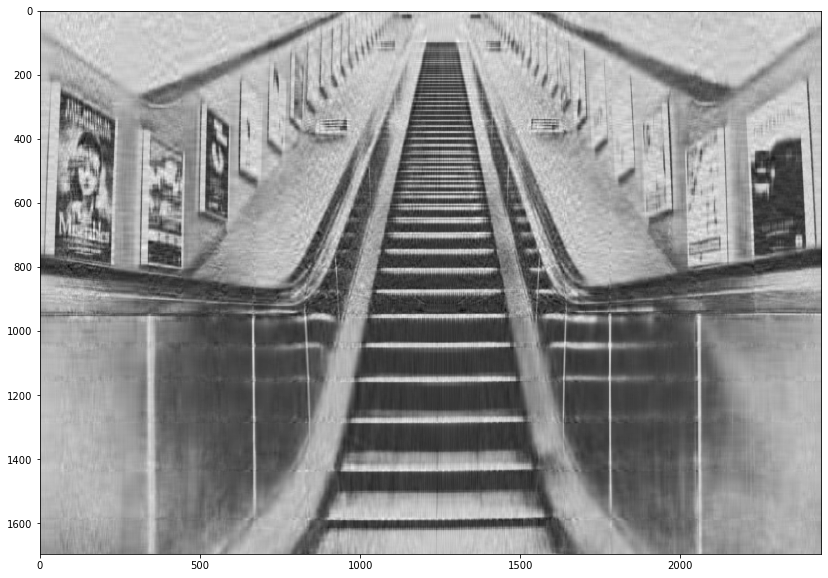

In [172]:
# Compressed image

Q, S_val, P = np.linalg.svd(img, full_matrices=False)

# Working only on the 50 first values of S_val
S_val[50:] = 0

m = np.size(img, 0)
n = np.size(img, 1)

img_compressed = np.dot(Q, np.dot(np.diag(S_val), P))

# -----------------------------------------------------------------

# Displaying results

fig, ax = plt.subplots(figsize=(14, 14*img_compressed.shape[1]/img_compressed.shape[0]))
ax.imshow(img_compressed, cmap='gray')
plt.show()

The reslut is very similar, given the little number of value considered. Moreover, the loss of information looks to be in the diversity of black and white values (mainly grey here).

#### 4 - Radical compression - 1 value only 

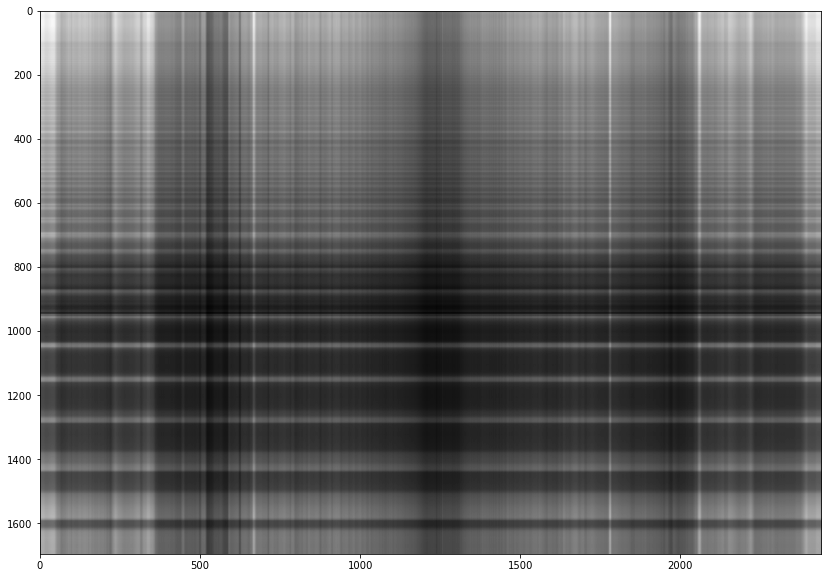

In [174]:
# Compressed image

Q, S_val, P = np.linalg.svd(img, full_matrices=False)

# Working only on the 50 first values of S_val
compression_value         = 1 # We only consider "compression_value" point(s) to get the image
S_val[compression_value:] = 0

m = np.size(img, 0)
n = np.size(img, 1)

img_compressed = np.dot(Q, np.dot(np.diag(S_val), P))

# -----------------------------------------------------------------

# Displaying results

fig, ax = plt.subplots(figsize=(14, 14*img_compressed.shape[1]/img_compressed.shape[0]))
ax.imshow(img_compressed, cmap='gray')
plt.show()

In [200]:
# Calculation number of float values to define img

equation_img      = m**2 + n**2 + min(m,n)

equation_img_comp = m**2 + n**2 + compression_value - (max(n,m) - min(n,m))*m - (min(n,m) - compression_value)*n

print("{} points are needed to define img when compressed, while we needed {} points before".format(equation_img_comp, equation_img))
print("\nWe then need {} points less, approximatively {:.0f} % less".format(equation_img - equation_img_comp, ((equation_img - equation_img_comp)/equation_img)*100))

3430905 points are needed to define img when compressed, while we needed 8826833 points before

We then need 5395928 points less, approximatively 61 % less


#### 5 - Cases with 10 and then 100 values

In [208]:
# Compressed image - 10 values

Q, S_val, P = np.linalg.svd(img, full_matrices=False)

# Working only on the 10 first values of S_val
compression_value_1       = 10  # We only consider "compression_value" point(s) to get the image
S_val[compression_value_1:] = 0

img_compressed_10 = np.dot(Q, np.dot(np.diag(S_val), P))

# -----------------------------------------------------------------

Q, S_val, P = np.linalg.svd(img, full_matrices=False)

# Working only on the 100 first values of S_val
compression_value_2       = 100  # We only consider "compression_value" point(s) to get the image
S_val[compression_value_2:] = 0

img_compressed_100 = np.dot(Q, np.dot(np.diag(S_val), P))

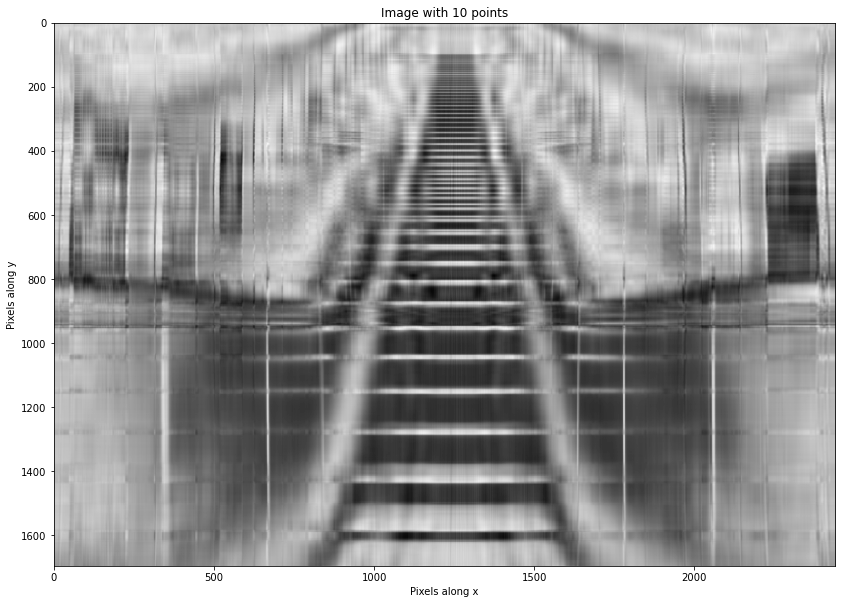

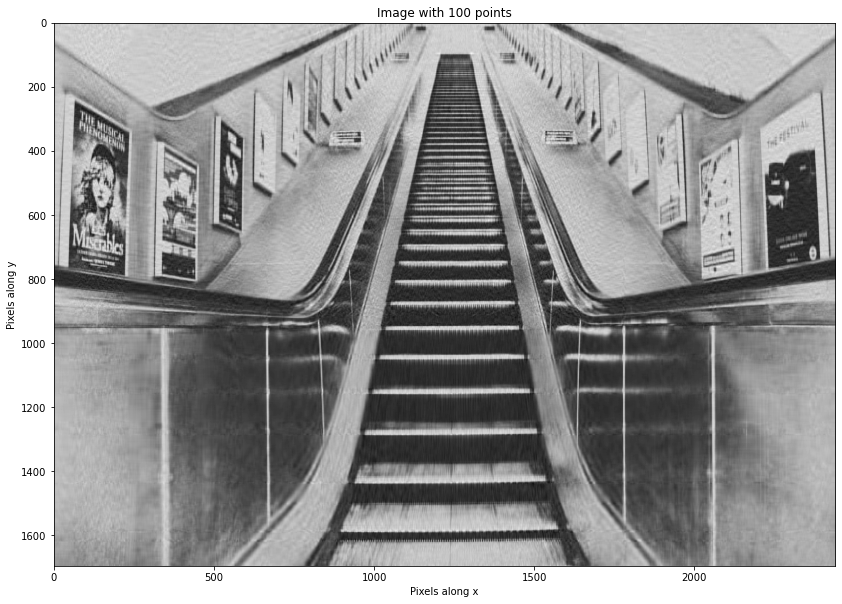

In [209]:
# Displaying results

# 10 points
fig, ax = plt.subplots(figsize=(14, 14*img_compressed_10.shape[1]/img_compressed_10.shape[0]))
ax.imshow(img_compressed_10, cmap='gray')

plt.title('Image with 10 points')
plt.xlabel('Pixels along x')
plt.ylabel('Pixels along y')

plt.show()

# ----------------------------------------------------------------------------------------------

# 100 points
fig, ax = plt.subplots(figsize=(14, 14*img_compressed_100.shape[1]/img_compressed_100.shape[0]))
ax.imshow(img_compressed_100, cmap='gray')

plt.title('Image with 100 points')
plt.xlabel('Pixels along x')
plt.ylabel('Pixels along y')

plt.show()

In [225]:
# Calculation number of float values to define img

equation_img        = m**2 + n**2 + min(m,n)

equation_img_comp_1 = m**2 + n**2 + compression_value_1 - (max(n,m) - min(n,m))*m - (min(n,m) - compression_value_1)*n
equation_img_comp_2 = m**2 + n**2 + compression_value_2 - (max(n,m) - min(n,m))*m - (min(n,m) - compression_value_2)*n

print("Case n = 10 points :")
print("{} points are needed to define img when compressed, while we needed {} points before".format(equation_img_comp_1, equation_img))
print("We then need {} points less, approximatively {:.0f} % less than uncompressed case".format(equation_img - equation_img_comp_1, ((equation_img - equation_img_comp_1)/equation_img)*100))

print("\n --------------------------- \n")

print("Case n = 100 points :")
print("{} points are needed to define img when compressed, while we needed {} points before".format(equation_img_comp_2, equation_img))
print("We then need {} points less, approximatively {:.0f} % less than uncompressed case".format(equation_img - equation_img_comp_2, ((equation_img - equation_img_comp_2)/equation_img)*100))

print("\n --------------------------- \n")

print("By comprasion, with 10 points, we need {:.3f} % less values than with 100 points, ~ {} points".format(((equation_img_comp_2 - equation_img_comp_1)/equation_img_comp_2)*100, equation_img_comp_2 - equation_img_comp_1))

Case n = 10 points :
3452865 points are needed to define img when compressed, while we needed 8826833 points before
We then need 5373968 points less, approximatively 61 % less than uncompressed case

 --------------------------- 

Case n = 100 points :
3672465 points are needed to define img when compressed, while we needed 8826833 points before
We then need 5154368 points less, approximatively 58 % less than uncompressed case

 --------------------------- 

By comprasion, with 10 points, we need 5.980 % less values than with 100 points, ~ 219600 points


$\rightarrow$ Economy of place with a good model of reality.

### Exercise 2: the SVD to extract information from datasets

The SVD can also be used to identify correlations in data, e.g. in the measurements of many different sensors as a function of time. It relies on the fact that the various approximates M<sub>i</sub> can be in some case directly interpreted. Imagine we measure the weight and height of N individuals. Presumably, the result would look like that (run the cell below)

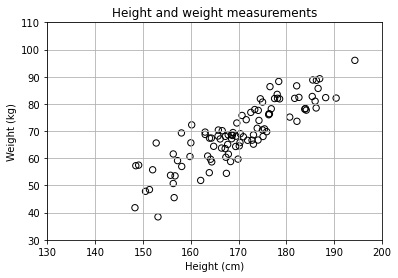

In [232]:
# Example

N      = 100 # pœple
weight = 70 + 10 * np.random.normal(size=N)
height = 108 + 0.9 * weight + 5 * np.random.normal(size=N)

M = np.array([height, weight])

plt.title("Height and weight measurements")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

plt.xlim([130, 200])
plt.ylim([30, 110])

plt.grid()

plt.scatter(M[0, :], M[1, :], s=40, facecolors='none', edgecolors='k')
plt.show()

We created this dataset ourselves, but let us forget about that and try to extract the correlation between these two variables only from the dataset. To do so, we must consider dimensionless variables of similar spread and therefore introduce the reduced variables

$$ \tilde{x} = \frac{x - \mathrm{mean}(x)}{\mathrm{std}(x)},$$

1. What is the size of M? Compute `M_reduced`, an array of similar size filled with the same height and weight data as M but of zero mean a unity standard deviation, then print these reduced height and weight measurements.

2. Perform the SVD of this reduced array. How many singular values are there ? 

3. Compute an approximation of `M_reduced` based on its first singular value only, then plot it. On the same graph, show the approximation you would get if only the second singular value is considered.

4. Print Q to check that it consists of two normalized *singular vectors*. Plot again the reduced measurements, then add both these vectors with [plt.arrow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.arrow.html). How can these two vectors be interpreted ?

#### 1 - M_reduced and adimensionnate x

In [236]:
# Size of M

print('M size is : {} and its shape is {}'.format(M.size, M.shape))

M size is : 200 and its shape is (2, 100)


In [247]:
# Creation of adimensioned variables : -mean value and divided by gap with mean line (y=x?)

height_adim = (height - np.mean(height))/np.std(height)
weight_adim = (weight - np.mean(weight))/np.std(weight)

M = np.array([height_adim, weight_adim])

print('~ Zero mean : ')
print('height : ' + str(np.mean(height_adim)) + '   weight : ' + str(np.mean(weight_adim)) + '')

print("\n~ Unit variation : ")
print('height : ' + str(np.std(height_adim))  + '   weight : ' + str(np.std(weight_adim)) + '')

~ Zero mean : 
height : -2.3936408410918374e-15   weight : -2.9753977059954197e-16

~ Unit variation : 
height : 1.0   weight : 0.9999999999999998


#### 2 - Perform SVD

In [252]:
# SVD decomposition

Q, S_val, P = np.linalg.svd(M)

print(Q.shape, S_val.shape, P.shape)

(2, 2) (2,) (100, 100)


In [257]:
print("There are " + str(len(S_val)) + " singular values in S_val matrix")
print(S_val)

m = np.size(M, 0)
n = np.size(M, 1)

sigma = np.zeros((m,n))

for i in range(min(m,n)):
    sigma[i][i] = S_val[i]
    
M_compressed = np.dot(Q, np.dot(sigma, P))

There are 2 singular values in S_val matrix
[13.64496399  3.71684781]
200


#### 3 - Approximation M with it first singular value

In [281]:
# Compressed image

Q, S_val, P = np.linalg.svd(M, full_matrices=False)

# Working only on the first value of S_val
S_val[1] = 0

M_compressed_1 = np.dot(Q, np.dot(np.diag(S_val), P))

# -----------------------------------------------------------------

Q, S_val, P = np.linalg.svd(M, full_matrices=False)

# Working only on the second value of S_val
S_val[0] = 0

M_compressed_2 = np.dot(Q, np.dot(np.diag(S_val), P))

# -----------------------------------------------------------------

Q, S_val, P = np.linalg.svd(M, full_matrices=False)

# Working on both values of S_val

M_compressed = np.dot(Q, np.dot(np.diag(S_val), P))

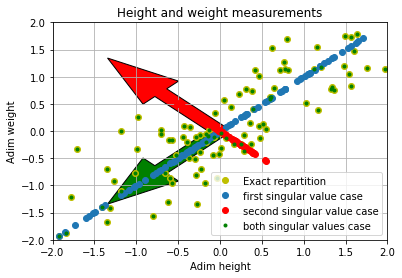

In [341]:
# Displaying results

plt.figure()

plt.plot(M[0], M[1], 'yo', label = r'Exact repartition')
plt.plot(M_compressed_1[0], M_compressed_1[1], 'o', label = r'first singular value case')
plt.plot(M_compressed_2[0], M_compressed_2[1], 'ro', label = r'second singular value case')
plt.plot(M_compressed[0], M_compressed[1], 'g.', label = r'both singular values case')

plt.title("Height and weight measurements")
plt.xlabel("Adim height")
plt.ylabel("Adim weight")

# -----------------------------------------------------------------

# Q = (Q[0][0], Q[0][1]
#      Q[1][0], Q[1][1])

plt.arrow(0, 0, Q[0][0], Q[0][1], width = 0.2, fc ='green', label = 'First eigenvector')
plt.arrow(0, 0, Q[1][0], Q[1][1], width = 0.2, fc ='red', label = 'Second eigenvector')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.legend(loc = 4)

plt.grid('True')

#### 4 - Interpretation

As expected, perfect match between compressed matrix and initial one. On the other hand, it's not really the case when considering only one of the two singular value.

Then, while the case of the first singular value respect the "direction" of repartition as well as the length the particles take on the mesh, the case with the ssecond singular value isn't even close from the model.

In fact, it's not that each singular value approach the form of the compressed matrix, but rather that the combination of these is supposed to bring back the initial shape.
To keep things simple, we kind of decompose the shape of initial shape into different components. Then here the first singular looks to account for the overall length while the second one rather represent the overall width.

This observation might be expandable to this method : the caracteristic set of greatness defined by the very first singular values while the following one rather counts as "details".